## County Data Reading and Initial Cleaning

The purpose of this notebook is to explore the main dataset that will be used for the capstone project; reading it in, identifying any missing variables, and re-formating for deeper exploration.

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msn

#### County-level data on U.S. opioid distributions, demographics, healthcare supply, and healthcare access


Link to data article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7881250/

- "This dataset was originally created to assist researchers in identifying which factors predict per capita opioid pill volume (PCPV) in a county, whether early state Medicaid expansions increased PCPV, and PCPV's association with opioid-related mortality"


In [2]:
analytics = pd.read_csv('./data/Analytic_File_3-31-21_DIB.csv')

In [3]:
analytics.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,CANCER_DEATHS_NOIMP,CANCER_CDR,NP_RX,PDMP_REQ_CHECK
0,2006,2013,AK,Aleutians East (B),"ALEUTIANS EAST (B), AK",9.0,1.0,5,0,0,...,45.561012,5.855686,0,NaN,23.978888,NaN,NaN,32.210746,1,0
1,2006,2130,AK,Ketchikan Gateway (B),"KETCHIKAN GATEWAY (B), AK",7.0,2.0,9,1,0,...,31.358338,10.213688,0,NaN,29.214887,NaN,72.0,53.795577,1,0
2,2006,2016,AK,Aleutians West (CA),"ALEUTIANS WEST (CA), AK",7.0,2.0,2,0,0,...,38.518801,3.683909,0,NaN,11.462599,NaN,NaN,32.214865,1,0
3,2006,2185,AK,North Slope (B),"NORTH SLOPE (B), AK",7.0,1.0,2,0,0,...,46.973366,6.083535,0,NaN,40.258017,NaN,30.0,45.399516,1,0
4,2006,2280,AK,Wrangell-Petersburg (CA),"WRANGELL-PETERSBURG (CA), AK",7.0,2.0,24,2,0,...,100.000000,100.000000,0,NaN,410.104987,NaN,39.0,63.976378,1,0


#### Missing Values

Many columns directly from the AHRF data pulled are represented with a combination 'F' and string of 5 digits. Renaming columns to better match the description of the data each represents.

<AxesSubplot:>

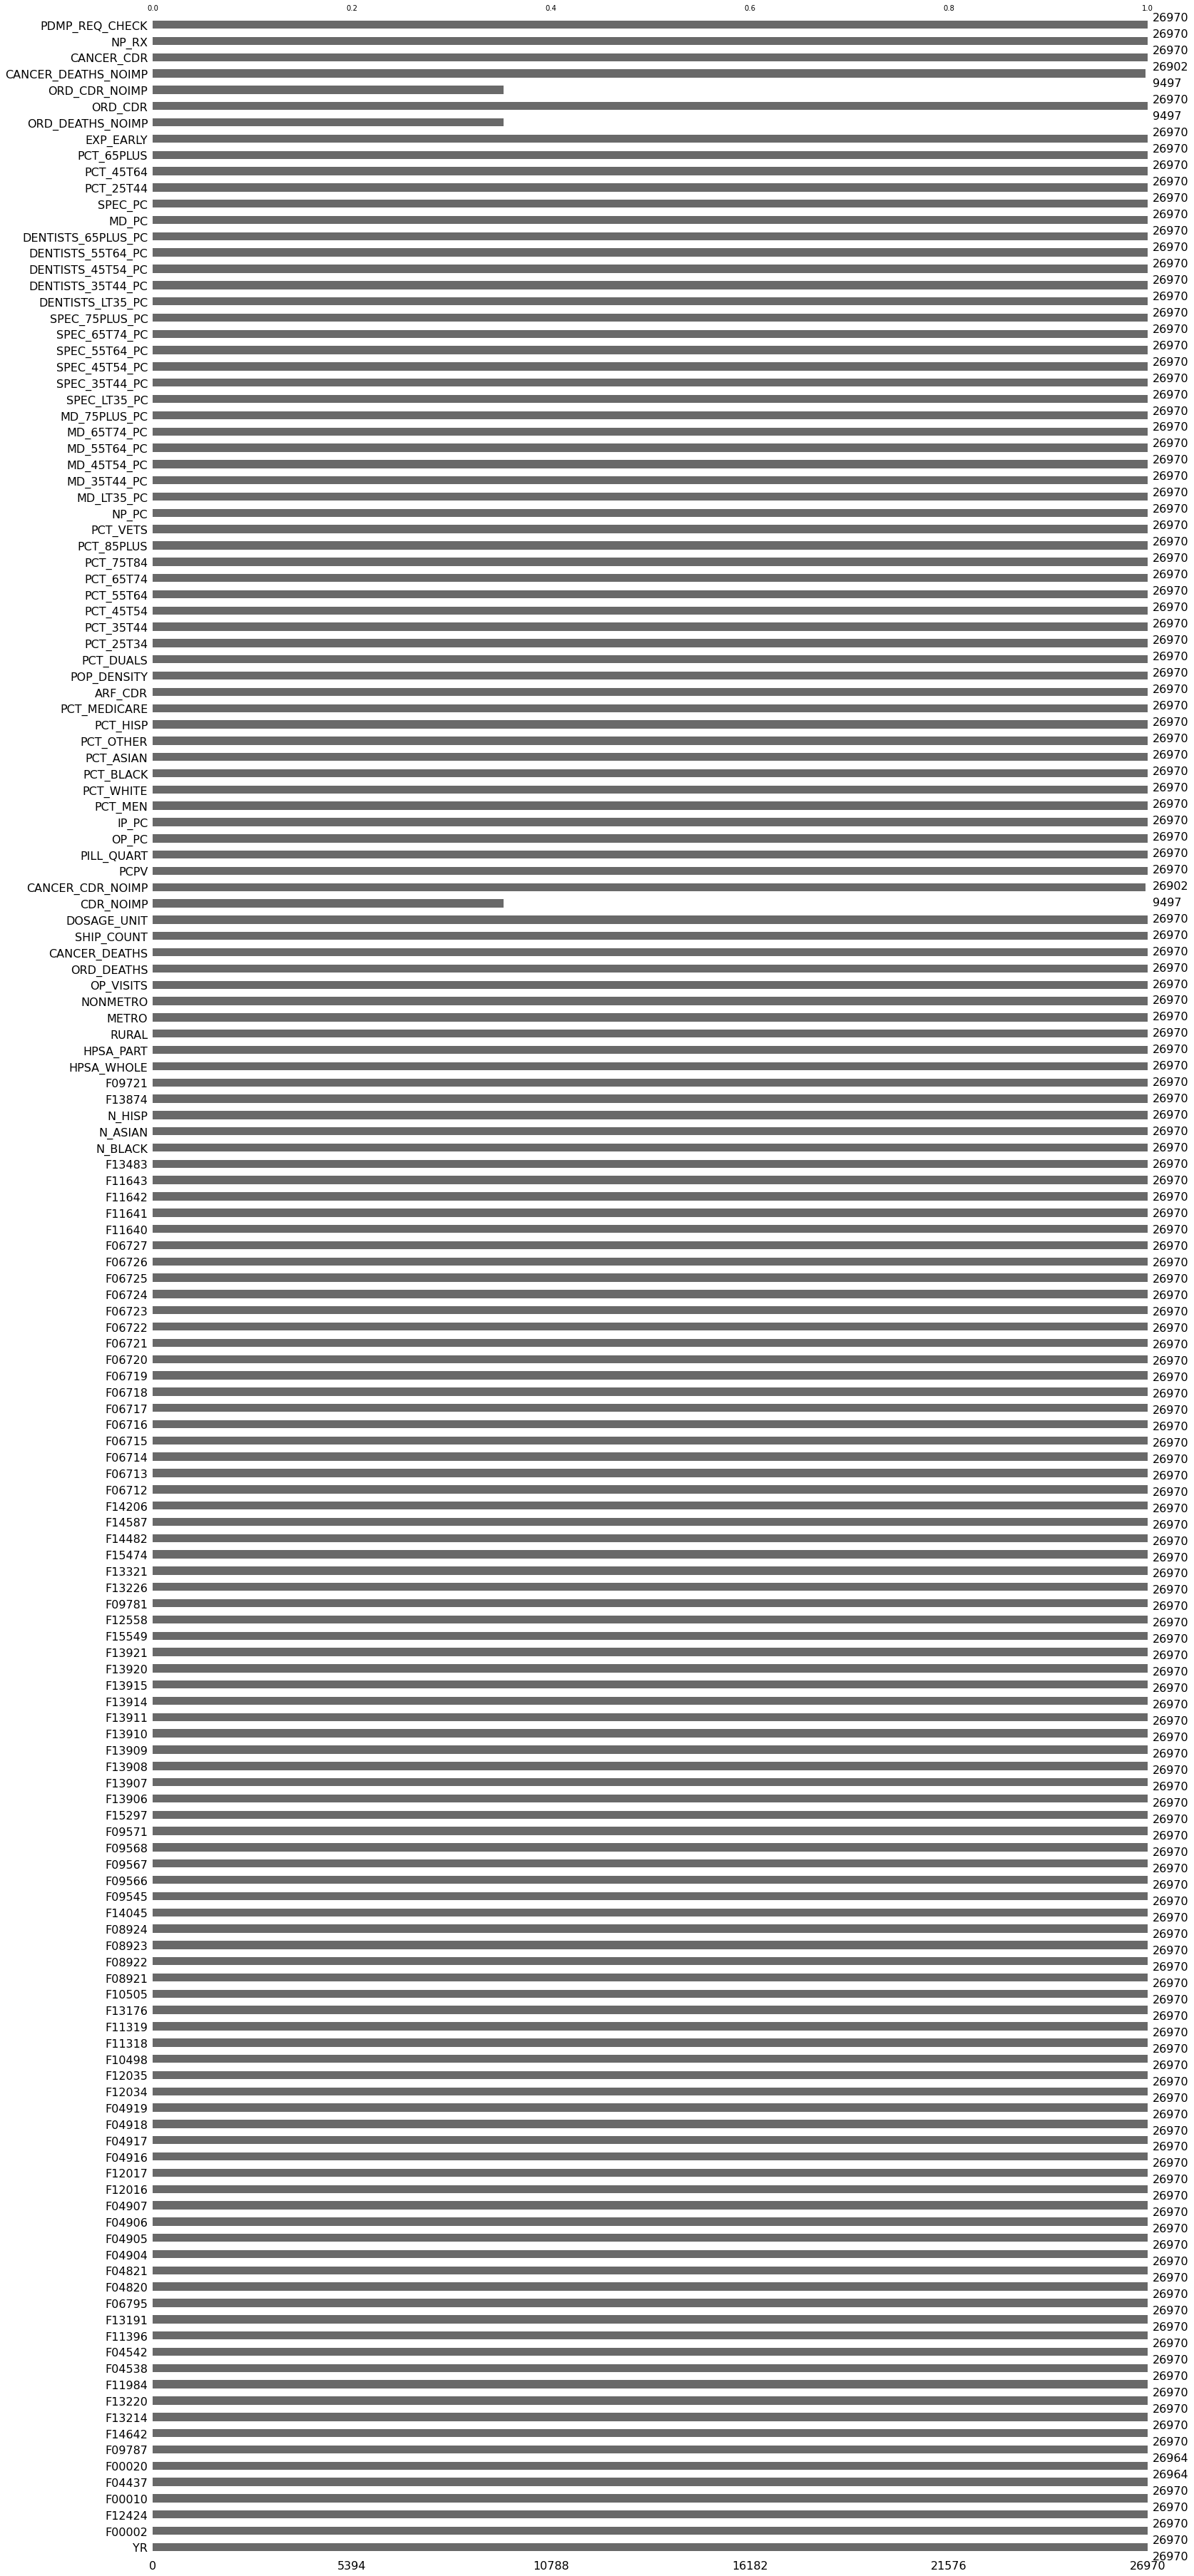

In [4]:
# checking for missing values
msn.bar(analytics)

#### Renaming Columns

Because much of this data was pulled from federal sources, many of the variables are labeled with codes. Thankfully, the organization that collaberated this data defined each code, leaving me able to change the labels to more descriptive versions.

From the data brief: 'Hot deck imputation was used to impute a small number of missing values (1.2% of cells)...Percentages of calculated variables may not sum to 100 due to imputation'

In [5]:
rename_dict = {
    'YR':'year',
    'F00002':'fips_code',
    'F12424':'state_abrv',
    'F00010':'county',
    'F09721':'tot_land_area',
    'F14642':'num_nurses',
    'F13214':'num_home_health_agents',
    'F13220':'num_hospices',
    'F11984':'pop_est',
    'F11396':'vet_pop_est',
    'F13191':'num_qualify_medicare',
    'F06795':'unemploy_rate',
    'F04820':'num_docs_male',
    'F04821':'num_docs_fem',
    'F04904':'num_docs_under35',
    'F04905':'num_docs_35-44',
    'F04906':'num_docs_45-54',
    'F04907':'num_docs_55-64',
    'F12016':'num_docs_65-74',
    'F12017':'num_docs_75above',
    'F04916':'num_specialists_under35',
    'F04917':'num_specialists_35-44',
    'F04918':'num_specialists_45-54',
    'F04919':'num_specialists_55-64',
    'F12034':'num_specialists_65-74',
    'F12035':'num_specialists_75above',
    'F10498':'num_dents_under35',
    'F11318':'num_dents_35-44',
    'F11319':'num_dents_45-54',
    'F13176':'num_dents_55-64',
    'F10505':'num_dents_65above',
    'F08921':'num_hos_beds',
    'F08922':'num_short_term_gen_beds',
    'F08923':'num_short_term_nongen_beds',
    'F08924':'num_long_term_beds',
    'F14045':'num_nursehome_beds',
    'F09545':'num_inpatient_days',
    'OP_VISITS':'tot_outpatient_visits',
    'F15297':'per_cap_medicare_cost',
    'F13906':'tot_male_pop',
    'F13907':'tot_fem_pop',
    'F13908':'tot_white_male_pop',
    'F13909':'tot_white_fem_pop',
    'F13910':'tot_black_male_pop',
    'F13911':'tot_black_fem_pop',
    'F13914':'tot_asian_male_pop',
    'F13915':'tot_asian_fem_pop',
    'F13920':'tot_hispanic_male_pop',
    'F13921':'tot_hispanic_fem_pop',
    'F15549':'num_has_medicare',
    'F12558':'num_deaths_any',
    'F09781':'per_cap_income',
    'F13226':'med_househld_income',
    'F13321':'prcnt_poverty',
    'F15474':'prcnt_under65_no_insurance',
    'F14482':'prcnt_25up_college',
    'F14587':'prcnt_manuf_employee',
    'F14206':'num_qualify_medicaid_medicare',
    'F06712':'num_males_20-24',
    'F06713':'num_fem_20-24',
    'F06714':'num_males_25-29',
    'F06715':'num_fem_25-29',
    'F06716':'num_male_30-34',
    'F06717':'num_fem_30-34',
    'F06718':'num_male_35-44',
    'F06719':'num_fem_35-44',
    'F06720':'num_male_45-54',
    'F06721':'num_fem_45-54',
    'F06722':'num_male_55-59',
    'F06723':'num_fem_55-59',
    'F06724':'num_male_60-64',
    'F06725':'num_fem_60-64',
    'F06726':'num_male_65-74',
    'F06727':'num_fem_65-74',
    'F11640':'num_male_75-84',
    'F11641':'num_fem_75-84',
    'F11642':'num_male_85up',
    'F11643':'num_fem_85up',
    'F13483':'med_age',
    'F09571':'num_veteran_outpat_vists'
}

In [6]:
analytics.rename(columns=rename_dict, inplace=True)

#### Dropping Variables

The reason for dropping each variables is explained in the commented code bellow, many being left over columns that were used for feature engineering of other included columns.

In [7]:
analytics.drop(['F04437', # combination of county name and state abv, redundant
                'F13874', # total area, including water area, not relevant
                'F09787', # column that has been dummified by 'hpsa_whole' and 'hpsa_part'
                'F00020', # column that has been dummified by 'rural', 'metro', and 'nonmetro'
                'F09566', # combined with 'F09567' and 'F09568' into 'tot_outpatient_visits'
                'F09567', # combined with 'F09566' and 'F09568' into 'tot_outpatient_visits'
                'F09568', # combined with 'F09566' and 'F09567' into 'tot_outpatient_visits'
                'F04538', # already covered by 'pct_black'
                'F04542', # already covered by 'pct_hisp'
                'CDR_NOIMP', 'ORD_DEATHS_NOIMP', 'ORD_CDR_NOIMP', 'CANCER_CDR_NOIMP', 'CANCER_DEATHS_NOIMP'], # missing data, not imputed 
               axis=1, inplace=True)

#### Writing the Cleaned Data

After formating the columns to readable labels, the data was thenn written to a local folder for future analysis in other notebooks included in this project.

In [8]:
# convert other named columns to lowercase to match style
analytics.columns = analytics.columns.str.lower()

In [9]:
analytics.head()

,year,fips_code,state_abrv,county,num_nurses,num_home_health_agents,num_hospices,pop_est,vet_pop_est,num_qualify_medicare,...,md_pc,spec_pc,pct_25t44,pct_45t64,pct_65plus,exp_early,ord_cdr,cancer_cdr,np_rx,pdmp_req_check
0,2006,2013,AK,Aleutians East (B),5,0,0,2647.0,163,101.0,...,37.778617,0.000000,41.972044,45.561012,5.855686,0,23.978888,32.210746,1,0
1,2006,2130,AK,Ketchikan Gateway (B),9,1,0,13384.0,1549,1586.0,...,283.921100,52.301255,26.270173,31.358338,10.213688,0,29.214887,53.795577,1,0
2,2006,2016,AK,Aleutians West (CA),2,0,0,5239.0,363,139.0,...,38.175224,19.087612,40.255774,38.518801,3.683909,0,11.462599,32.214865,1,0
3,2006,2185,AK,North Slope (B),2,0,0,6608.0,388,401.0,...,75.665860,0.000000,39.694310,46.973366,6.083535,0,40.258017,45.399516,1,0
4,2006,2280,AK,Wrangell-Petersburg (CA),24,2,0,6096.0,755,841.0,...,180.446194,0.000000,100.000000,100.000000,100.000000,0,410.104987,63.976378,1,0


In [10]:
analytics.shape

(26970, 142)

In [11]:
analytics.to_csv('./data/working_data.csv', index=False)

In [12]:
analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26970 entries, 0 to 26969
Columns: 142 entries, year to pdmp_req_check
dtypes: float64(93), int64(46), object(3)
memory usage: 29.2+ MB


In [13]:
categorical_features = analytics.select_dtypes(exclude ='number').columns.tolist()
print(categorical_features)

['state_abrv', 'county', 'pill_quart']
